# Financial Risk Analysis with Python (Goldman Sachs Financial Analysis)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
goldman_df= pd.read_csv("goldman_sachs.csv")
print(goldman_df)

     TransactionID CustomerID AccountID AccountType TransactionType  \
0               33   CUST6549  ACC12334      Credit      Withdrawal   
1              177   CUST2942  ACC52650      Credit      Withdrawal   
2              178   CUST6776  ACC45101     Current         Deposit   
3              173   CUST2539  ACC88252     Current      Withdrawal   
4               67   CUST2626  ACC21878     Savings      Withdrawal   
..             ...        ...       ...         ...             ...   
795             11   CUST8461  ACC60432     Current      Withdrawal   
796             44   CUST1121  ACC41829      Credit      Withdrawal   
797            160   CUST3059  ACC28292     Current         Payment   
798             37   CUST1042  ACC28295     Current         Payment   
799            101   CUST2464  ACC53865        Loan         Deposit   

             Product    Firm   Region    Manager TransactionDate  \
0    Savings Account  Firm C  Central  Manager 1      21-10-2023   
1          

In [4]:
goldman_df.describe()

,TransactionID,TransactionAmount,AccountBalance,RiskScore,CreditRating,TenureMonths
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,98.401250,51575.671765,72345.657910,0.473415,566.586250,126.58250
std,56.292618,29055.838886,34070.038539,0.242858,151.674261,68.98532
min,1.000000,-30721.247890,-37293.600250,-0.389354,305.000000,6.00000
25%,50.000000,31692.004800,49157.502723,0.313286,436.500000,65.00000
50%,97.000000,50249.069385,72789.370195,0.472155,563.000000,132.00000
75%,146.000000,71913.394570,95352.455698,0.636848,696.000000,186.25000
max,199.000000,130726.914100,175247.539500,1.163728,849.000000,239.00000


In [5]:
goldman_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TransactionID      800 non-null    int64  
 1   CustomerID         800 non-null    object 
 2   AccountID          800 non-null    object 
 3   AccountType        800 non-null    object 
 4   TransactionType    800 non-null    object 
 5   Product            800 non-null    object 
 6   Firm               800 non-null    object 
 7   Region             800 non-null    object 
 8   Manager            800 non-null    object 
 9   TransactionDate    800 non-null    object 
 10  TransactionAmount  800 non-null    float64
 11  AccountBalance     800 non-null    float64
 12  RiskScore          800 non-null    float64
 13  CreditRating       800 non-null    int64  
 14  TenureMonths       800 non-null    int64  
dtypes: float64(3), int64(3), object(9)
memory usage: 93.9+ KB


In [6]:
goldman_df.isnull().sum()

TransactionID        0
CustomerID           0
AccountID            0
AccountType          0
TransactionType      0
Product              0
Firm                 0
Region               0
Manager              0
TransactionDate      0
TransactionAmount    0
AccountBalance       0
RiskScore            0
CreditRating         0
TenureMonths         0
dtype: int64

In [7]:
for col in goldman_df.columns:
    if goldman_df[col].nunique()<10:
        print(goldman_df[col].value_counts())
        print("--"*20)

AccountType
Loan       218
Credit     206
Savings    204
Current    172
Name: count, dtype: int64
----------------------------------------
TransactionType
Withdrawal    207
Payment       200
Deposit       199
Transfer      194
Name: count, dtype: int64
----------------------------------------
Product
Home Loan          176
Credit Card        168
Mutual Fund        162
Personal Loan      153
Savings Account    141
Name: count, dtype: int64
----------------------------------------
Firm
Firm B    168
Firm C    165
Firm D    164
Firm E    153
Firm A    150
Name: count, dtype: int64
----------------------------------------
Region
West       176
East       162
South      158
North      156
Central    148
Name: count, dtype: int64
----------------------------------------
Manager
Manager 1    218
Manager 3    209
Manager 2    193
Manager 4    180
Name: count, dtype: int64
----------------------------------------


In [8]:
goldman_df.duplicated().sum()

0

In [9]:
# If you want to drop duplicated sum:
df = goldman_df.drop_duplicates()
df.shape

(800, 15)

## Task 1: Data Cleaning and Formatting

In [10]:
# 1.1 Remove/treat any special characters or non-numeric entries from financial fields.

goldman_df["TransactionAmount"]= goldman_df["TransactionAmount"].abs()
financial_cols = ["TransactionAmount","AccountBalance"]
for col in financial_cols:
    goldman_df[col]= pd.to_numeric(goldman_df[col], errors="coerce")
goldman_df.columns
goldman_df.head()

,TransactionID,CustomerID,AccountID,AccountType,TransactionType,Product,Firm,Region,Manager,TransactionDate,TransactionAmount,AccountBalance,RiskScore,CreditRating,TenureMonths
0,33,CUST6549,ACC12334,Credit,Withdrawal,Savings Account,Firm C,Central,Manager 1,21-10-2023,87480.05448,74008.43310,0.729101,319,200
1,177,CUST2942,ACC52650,Credit,Withdrawal,Home Loan,Firm A,East,Manager 3,20-06-2023,20315.74505,22715.83590,0.472424,692,47
2,178,CUST6776,ACC45101,Current,Deposit,Personal Loan,Firm C,South,Manager 3,02-01-2023,10484.57165,42706.09210,0.648784,543,109
3,173,CUST2539,ACC88252,Current,Withdrawal,Mutual Fund,Firm A,Central,Manager 2,25-07-2023,45122.27373,114176.56870,0.734832,430,103
4,67,CUST2626,ACC21878,Savings,Withdrawal,Home Loan,Firm C,Central,Manager 4,25-07-2023,42360.79878,17863.02644,0.289304,468,234


In [11]:
# 1.2 Convert currency amounts into numerical format.

goldman_df.columns = goldman_df.columns.str.strip()

text_cols = goldman_df.select_dtypes(include="object").columns
goldman_df[text_cols] = goldman_df[text_cols].apply(lambda s: s.str.strip()) 
goldman_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TransactionID      800 non-null    int64  
 1   CustomerID         800 non-null    object 
 2   AccountID          800 non-null    object 
 3   AccountType        800 non-null    object 
 4   TransactionType    800 non-null    object 
 5   Product            800 non-null    object 
 6   Firm               800 non-null    object 
 7   Region             800 non-null    object 
 8   Manager            800 non-null    object 
 9   TransactionDate    800 non-null    object 
 10  TransactionAmount  800 non-null    float64
 11  AccountBalance     800 non-null    float64
 12  RiskScore          800 non-null    float64
 13  CreditRating       800 non-null    int64  
 14  TenureMonths       800 non-null    int64  
dtypes: float64(3), int64(3), object(9)
memory usage: 93.9+ KB


In [12]:
# 1.3 Validate and format date columns.

goldman_df["TransactionDate"]=goldman_df["TransactionDate"].apply(pd.to_datetime,format="%d-%m-%Y") 
goldman_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   TransactionID      800 non-null    int64         
 1   CustomerID         800 non-null    object        
 2   AccountID          800 non-null    object        
 3   AccountType        800 non-null    object        
 4   TransactionType    800 non-null    object        
 5   Product            800 non-null    object        
 6   Firm               800 non-null    object        
 7   Region             800 non-null    object        
 8   Manager            800 non-null    object        
 9   TransactionDate    800 non-null    datetime64[ns]
 10  TransactionAmount  800 non-null    float64       
 11  AccountBalance     800 non-null    float64       
 12  RiskScore          800 non-null    float64       
 13  CreditRating       800 non-null    int64         
 14  TenureMont

In [13]:
# 1.4 Ensure account types and transaction categories are standardized.

goldman_df["AccountType"]=goldman_df["AccountType"].str.strip().str.title() 
goldman_df["TransactionType"]=goldman_df["TransactionType"].str.strip().str.title()
df[["TransactionType","AccountType"]]

,TransactionType,AccountType
0,Withdrawal,Credit
1,Withdrawal,Credit
2,Deposit,Current
3,Withdrawal,Current
4,Withdrawal,Savings
...,...,...
795,Withdrawal,Current
796,Withdrawal,Credit
797,Payment,Current
798,Payment,Current


## Task 2: Descriptive Transactional Analysis

In [46]:
# 2.1 Calculate monthly and yearly summaries of total credits, debits, and net transaction volume. 

Credit = {"deposit"}
Debit = {"withdrawal", "transfer", "payment"}

goldman_df["Credit"] = np.where(
    goldman_df["TransactionType"].str.lower().isin(Credit),
    goldman_df["TransactionAmount"],
    0)

goldman_df["Debit"] = np.where(
    goldman_df["TransactionType"].str.lower().isin(Debit),
    goldman_df["TransactionAmount"],
    0)

goldman_df[["TransactionType", "TransactionAmount", "Credit", "Debit"]].head()


,TransactionType,TransactionAmount,Credit,Debit
0,Withdrawal,87480.05448,0.00000,87480.05448
1,Withdrawal,20315.74505,0.00000,20315.74505
2,Deposit,10484.57165,10484.57165,0.00000
3,Withdrawal,45122.27373,0.00000,45122.27373
4,Withdrawal,42360.79878,0.00000,42360.79878


In [47]:
# Define Transaction Sign Function
def txn_sign(txn_type: str) -> int:
    t = str(txn_type).lower()
    
    if any(k in t for k in Debit):
        return -1
    if any(k in t for k in Credit):
        return 1
    return 1   

goldman_df["Sign"] = goldman_df["TransactionType"].apply(txn_sign) 
goldman_df["Net_Amount"] = goldman_df["TransactionAmount"] * goldman_df["Sign"]

# Extract Month and Year
goldman_df["Year"]= goldman_df["TransactionDate"].dt.year
goldman_df["Month"]= goldman_df["TransactionDate"].dt.to_period("M").astype(str)


Monthly_Summary = goldman_df.groupby("Month").agg(
    TotalCredits = ("TransactionAmount",lambda s: s[goldman_df.loc[s.index, "Sign"] == 1].sum()),
    TotalDebits = ("TransactionAmount",lambda s: s[goldman_df.loc[s.index, "Sign"] == -1].sum()),
    Net = ("Net_Amount", "sum")).reset_index()

Yearly_Summary = goldman_df.groupby("Year").agg(
    TotalCredits=("TransactionAmount", lambda s: s[goldman_df.loc[s.index, "Sign"]==1].sum()),    
    TotalDebits=("TransactionAmount", lambda s: s[goldman_df.loc[s.index, "Sign"]==-1].sum()), 
    Net= ("Net_Amount","sum")).reset_index()

goldman_df.head()


,TransactionID,CustomerID,AccountID,AccountType,TransactionType,Product,Firm,Region,Manager,TransactionDate,...,Debit,Sign,Net_Amount,Year,Month,Z_Score,Account_Z_Score,mean,std,Suspicious_Flag
0,33,CUST6549,ACC12334,Credit,Withdrawal,Savings Account,Firm C,Central,Manager 1,2023-10-21,...,87480.05448,-1,-87480.05448,2023,2023-10,1.266887,0.048835,49887.728808,33313.671985,Normal
1,177,CUST2942,ACC52650,Credit,Withdrawal,Home Loan,Firm A,East,Manager 3,2023-06-20,...,20315.74505,-1,-20315.74505,2023,2023-06,1.148219,1.457611,36902.013377,14065.987550,Normal
2,178,CUST6776,ACC45101,Current,Deposit,Personal Loan,Firm C,South,Manager 3,2023-01-02,...,0.00000,1,10484.57165,2023,2023-01,1.501730,0.870504,41030.172409,18490.839636,Normal
3,173,CUST2539,ACC88252,Current,Withdrawal,Mutual Fund,Firm A,Central,Manager 2,2023-07-25,...,45122.27373,-1,-45122.27373,2023,2023-07,0.256222,1.228560,45964.845189,19635.853727,Normal
4,67,CUST2626,ACC21878,Savings,Withdrawal,Home Loan,Firm C,Central,Manager 4,2023-07-25,...,42360.79878,-1,-42360.79878,2023,2023-07,0.355519,1.600137,38669.930615,5219.675816,Normal


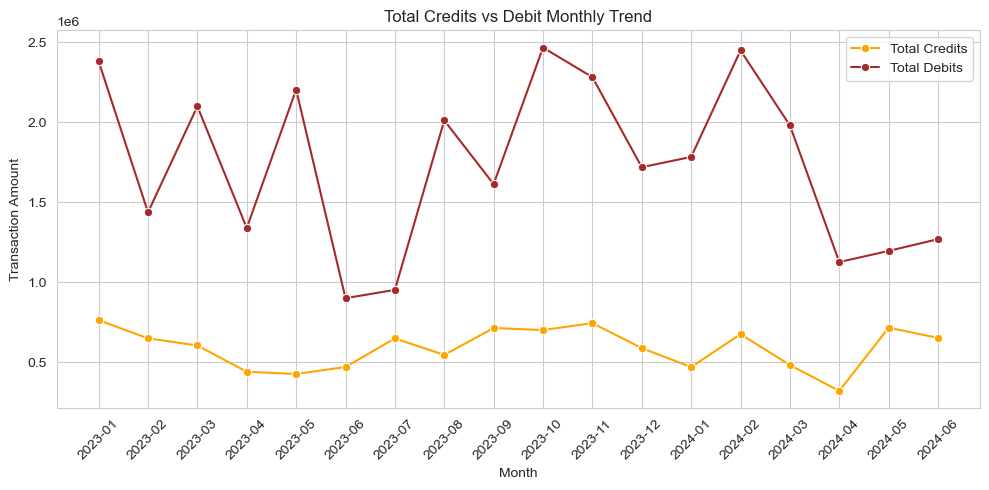

In [39]:
# 2.2 Plot trends in total credits vs. debits over time.

sns.set_style(style="whitegrid")
plt.figure(figsize=(10,5))

# Plot lines
sns.lineplot(
    data=Monthly_Summary,
    x="Month",
    y="TotalCredits",
    marker="o",
    label="Total Credits",
    color= "Orange")

sns.lineplot(
    data=Monthly_Summary,
    x="Month",
    y="TotalDebits",
    marker="o",
    label="Total Debits",
    color = "Brown")


plt.title("Total Credits vs Debit Monthly Trend")
plt.xlabel("Month")
plt.ylabel("Transaction Amount")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [49]:
# 2.3 Identify top and bottom performing accounts based on net inflow.

# Top performing accounts
 
Top_Accounts= goldman_df.sort_values(by="Net_Amount",ascending=False).head(5)
print(f"Top Performing Accounts:\n{Top_Accounts[["Net_Amount","AccountBalance"]]}")

# Bottom Performing Accounts

Bottom_Accounts = goldman_df.sort_values(by="Net_Amount",ascending=True).head(5)
print(f"Bottom Performing Accounts:\n{Bottom_Accounts[["Net_Amount","AccountBalance"]]}")

Top Performing Accounts:
      Net_Amount  AccountBalance
741  130149.3799     51092.98942
237  127718.9013     33532.61157
234  122856.4830     93754.78157
379  118019.7086     42088.94404
269  113221.7353     32952.55399
Bottom Performing Accounts:
      Net_Amount  AccountBalance
790 -130726.9141   116386.890400
80  -130475.1663    14174.176850
338 -129983.6051    42085.195500
319 -128816.2360   150199.078600
320 -127907.5731     9228.815058


In [18]:
# 2.4 Identify and flag accounts as dormant or inactive if there is a gap of two months or more between consecutive transactions. 

goldman_df_sorted= goldman_df.sort_values(['AccountID','TransactionDate'])
goldman_df_sorted["PrevDate"] = goldman_df_sorted.groupby('AccountID')['TransactionDate'].shift(1)

goldman_df_sorted['GapDays'] = (
    goldman_df_sorted['TransactionDate'] - goldman_df_sorted['PrevDate']).dt.days

goldman_df_sorted["DormantFlag"] = goldman_df_sorted["GapDays"] >= 60 #If gap days is more than 60(2 months) its considered as Dormant

Dormant_accounts = (goldman_df_sorted.groupby("AccountID")["DormantFlag"].
                    any().reset_index(name="Is-Dormant"))
goldman_df.head()
print(Dormant_accounts)

    AccountID  Is-Dormant
0    ACC10117        True
1    ACC10996        True
2    ACC11062        True
3    ACC11188        True
4    ACC11285       False
..        ...         ...
189  ACC97225        True
190  ACC97411        True
191  ACC99117        True
192  ACC99409        True
193  ACC99549        True

[194 rows x 2 columns]


## Task 3: Customer Profile Building

In [19]:
# 3.1 Group accounts by activity levels: High, Medium, Low based on transaction frequency on your 
# analysis and rubrics. Do not forget to mention the rubric in the headings.

Transaction_frequency = (goldman_df.groupby(["CustomerID","Month"]).
                        size().reset_index(name="TransactionCount"))
print(Transaction_frequency)

Avg_Monthly_Transaction= (Transaction_frequency.groupby("CustomerID")["TransactionCount"].
                          mean().reset_index(name="Avg_Monthly_Transaction"))
print(Avg_Monthly_Transaction)                                                                                                  

def ActivityLevel(x):
    if x >= 20: 
        return "High" 
    if x >= 5:  
        return "Medium" 
    else:
        return "Low"

Avg_Monthly_Transaction["ActivityLevel"] = Avg_Monthly_Transaction["Avg_Monthly_Transaction"].apply(ActivityLevel)

print((Avg_Monthly_Transaction["ActivityLevel"]).head(100))


    CustomerID    Month  TransactionCount
0     CUST1042  2023-03                 1
1     CUST1042  2023-04                 1
2     CUST1042  2023-05                 2
3     CUST1042  2023-07                 1
4     CUST1042  2023-10                 1
..         ...      ...               ...
700   CUST9843  2024-01                 1
701   CUST9843  2024-02                 1
702   CUST9962  2023-09                 2
703   CUST9962  2024-01                 1
704   CUST9962  2024-04                 2

[705 rows x 3 columns]
    CustomerID  Avg_Monthly_Transaction
0     CUST1042                 1.142857
1     CUST1114                 1.333333
2     CUST1121                 1.333333
3     CUST1189                 1.000000
4     CUST1223                 1.000000
..         ...                      ...
183   CUST9683                 1.750000
184   CUST9731                 1.500000
185   CUST9754                 1.333333
186   CUST9843                 1.000000
187   CUST9962                 1

In [48]:
# 3.2 Segment customers by average balance and transaction volume. 
Account_metrics = (goldman_df.groupby("AccountID").agg(          
    Total_Credit=("Credit", "sum"),          
    Total_Debit=("Debit", "sum"),          
    Transaction_Volume=("TransactionAmount", "sum")).
    assign(Net_Inflow = lambda x: x["Total_Credit"]- x["Total_Debit"]).reset_index())

Account_metrics.head()

,AccountID,Total_Credit,Total_Debit,Transaction_Volume,Net_Inflow
0,ACC10117,142170.20378,57310.763650,199480.967430,84859.440130
1,ACC10996,62580.86356,188158.687390,250739.550950,-125577.823830
2,ACC11062,0.00000,27189.136160,27189.136160,-27189.136160
3,ACC11188,45748.34156,211828.262030,257576.603590,-166079.920470
4,ACC11285,0.00000,96729.609841,96729.609841,-96729.609841


In [50]:
# 3.3 Create profiles for:        
# a) High-net inflow accounts:

High_inflow = Account_metrics["Net_Inflow"].quantile(0.75) 
Low_inflow = Account_metrics["Net_Inflow"].quantile(0.25) 

High_volume = Account_metrics["Transaction_Volume"].quantile(0.75) 
Low_volume = Account_metrics["Transaction_Volume"].quantile(0.25)

def customer_seg(row):
    if row["Net_Inflow"] >= High_inflow or row["Transaction_Volume"] >= High_volume:
        return "High Value"
    elif row["Net_Inflow"] <= Low_inflow or row["Transaction_Volume"] <= Low_volume:
        return "Low Value"
    else:
        return "Medium Value"

Account_metrics["Customer_segment"]= Account_metrics.apply(customer_seg, axis=1)
Account_metrics.head()


,AccountID,Total_Credit,Total_Debit,Transaction_Volume,Net_Inflow,Customer_segment
0,ACC10117,142170.20378,57310.763650,199480.967430,84859.440130,High Value
1,ACC10996,62580.86356,188158.687390,250739.550950,-125577.823830,Medium Value
2,ACC11062,0.00000,27189.136160,27189.136160,-27189.136160,Low Value
3,ACC11188,45748.34156,211828.262030,257576.603590,-166079.920470,Medium Value
4,ACC11285,0.00000,96729.609841,96729.609841,-96729.609841,Low Value


In [54]:
Account_metrics = (goldman_df.groupby("AccountID").agg(avg_balance=("AccountBalance", "mean"),
                    transaction_volume=("TransactionAmount", "sum")).reset_index()) 

Account_metrics.head()


,AccountID,avg_balance,transaction_volume
0,ACC10117,70107.007957,199480.967430
1,ACC10996,43568.008084,250739.550950
2,ACC11062,38137.132610,27189.136160
3,ACC11188,69652.151044,257576.603590
4,ACC11285,97401.348560,96729.609841


,CustomerID,AvgBalance,Total_Volume,Total_Net,Trans_Count
0,CUST1042,80435.167530,432345.676360,-284936.864820,8
1,CUST1114,60127.893845,385802.565919,-268029.670739,8
2,CUST1121,83213.472732,398205.117510,-398205.117510,4
3,CUST1189,63648.890237,117339.418890,-117339.418890,3
4,CUST1223,88186.197605,67776.465800,29853.686720,2


In [24]:
High_net_inflow = Customer_Profile.sort_values("Total_Net", ascending=False).head(10)
print(High_net_inflow)

    CustomerID     AvgBalance   Total_Volume      Total_Net  Trans_Count
34    CUST2457   77828.604797  172045.102170  172045.102170            3
92    CUST5121   25888.608522  283940.122520  165814.500740            4
61    CUST3378   72427.257926  355094.057637  149915.581643            8
50    CUST3006   67652.686910  264585.713400  107755.139840            4
79    CUST4461   59922.191420  198753.919640  105440.304080            3
90    CUST4884  118249.524200   88990.271030   88990.271030            1
19    CUST1776   64601.246775  250310.765680   61632.060360            4
52    CUST3041   65911.485433  329713.516090   58656.963290            6
168   CUST9038   76172.026766  295900.217580   56552.403640            5
113   CUST6029   57679.042213  110182.364544   54734.730336            3


In [25]:
# b) High-frequency low-balance accounts:

Customer_Profile["Balance_Bucket"]=pd.qcut(Customer_Profile["AvgBalance"],3,labels=["Low-Bal","Mid-Bal","High-Bal"])
Customer_Profile["Volume_Bucket"]=pd.qcut(Customer_Profile["Total_Volume"],3,labels=["Low-Volume","Mid-Volume","High-Volume"])
print(Customer_Profile["Balance_Bucket"],Customer_Profile["Volume_Bucket"])

Customer_Profile.head()


0      High-Bal
1       Low-Bal
2      High-Bal
3       Low-Bal
4      High-Bal
         ...   
183     Mid-Bal
184    High-Bal
185    High-Bal
186     Mid-Bal
187    High-Bal
Name: Balance_Bucket, Length: 188, dtype: category
Categories (3, object): ['Low-Bal' < 'Mid-Bal' < 'High-Bal'] 0      High-Volume
1      High-Volume
2      High-Volume
3       Low-Volume
4       Low-Volume
          ...     
183    High-Volume
184    High-Volume
185     Mid-Volume
186     Mid-Volume
187    High-Volume
Name: Volume_Bucket, Length: 188, dtype: category
Categories (3, object): ['Low-Volume' < 'Mid-Volume' < 'High-Volume']


,CustomerID,AvgBalance,Total_Volume,Total_Net,Trans_Count,Balance_Bucket,Volume_Bucket
0,CUST1042,80435.167530,432345.676360,-284936.864820,8,High-Bal,High-Volume
1,CUST1114,60127.893845,385802.565919,-268029.670739,8,Low-Bal,High-Volume
2,CUST1121,83213.472732,398205.117510,-398205.117510,4,High-Bal,High-Volume
3,CUST1189,63648.890237,117339.418890,-117339.418890,3,Low-Bal,Low-Volume
4,CUST1223,88186.197605,67776.465800,29853.686720,2,High-Bal,Low-Volume


In [26]:
High_freq_low_bal = Customer_Profile[(Customer_Profile["Trans_Count"] >= Customer_Profile["Trans_Count"].quantile(0.75)) &
                    (Customer_Profile["AvgBalance"] <= Customer_Profile["AvgBalance"].quantile(0.25))]
print(High_freq_low_bal)

    CustomerID    AvgBalance   Total_Volume      Total_Net  Trans_Count  \
1     CUST1114  60127.893845  385802.565919 -268029.670739            8   
53    CUST3059  59259.390588  296413.616370 -296413.616370            6   
54    CUST3069  48347.423620  179440.309010  -97487.457390            5   
80    CUST4584  52584.244758  298235.343843  -64988.794803            5   
94    CUST5253  47802.857312  177843.520130 -157496.948350            5   
99    CUST5428  58148.843446  261052.014510 -212246.224430            8   
101   CUST5545  61151.359039  265333.196444 -265333.196444            7   
109   CUST5912  61966.849233  354409.131240 -172474.809920            6   
111   CUST5920  61623.184390  554945.597570 -338546.753770            7   
130   CUST6937  52171.166596  220399.339887  -36247.379153            5   
153   CUST8155  49397.810737  266000.319070 -139503.197730            5   
154   CUST8250  51282.494454  243326.951520 -158946.685580            5   
157   CUST8288  59954.562

In [27]:
#c) Accounts with negative or near-zero balances:

Neg_or_near_zero_bal= Customer_Profile[(Customer_Profile["AvgBalance"] <= 0)]
print(Neg_or_near_zero_bal)


Empty DataFrame
Columns: [CustomerID, AvgBalance, Total_Volume, Total_Net, Trans_Count, Balance_Bucket, Volume_Bucket]
Index: []


## Task 4: Financial Risk Identification

In [28]:
# 4.1 Track accounts with frequent large withdrawals or overdrafts.

# Filter withdrawal transactions
Withdrawals = goldman_df[goldman_df["TransactionType"].str.contains("withdraw", na=False)]

# Define large withdrawal threshold
Large_withdrawal_threshold = Withdrawals["TransactionAmount"].quantile(0.90)

# Flag large withdrawals
Withdrawals["LargeWithdrawalFlag"] = (Withdrawals["TransactionAmount"] >= Large_withdrawal_threshold)

Large_withdrawals = (Withdrawals[Withdrawals["LargeWithdrawalFlag"]].groupby("AccountID")
                    .size().reset_index(name="LargeWithdrawalCount"))

print(Large_withdrawals)

Empty DataFrame
Columns: [AccountID, LargeWithdrawalCount]
Index: []


In [29]:
# Overdraft- Accounts with negative balance

Overdraft_accts = goldman_df[goldman_df["AccountBalance"] < 0].groupby("AccountID").size().reset_index(name="OverdraftTransCount") 
print(Overdraft_accts)

   AccountID  OverdraftTransCount
0   ACC16241                    1
1   ACC19178                    1
2   ACC23736                    1
3   ACC26973                    1
4   ACC28154                    1
5   ACC28292                    2
6   ACC29477                    1
7   ACC33287                    1
8   ACC49774                    1
9   ACC58667                    1
10  ACC70314                    1
11  ACC77533                    1
12  ACC83005                    1
13  ACC88449                    1
14  ACC94242                    1


In [30]:
#4.2 Calculate balance volatility using standard deviation or coefficient of variation. 

Bal_volt = goldman_df.groupby("AccountID")["AccountBalance"].agg(["mean","std"]).reset_index() 
Bal_volt["CV"] = Bal_volt["std"] / Bal_volt["mean"].replace(0, np.nan)
print(Bal_volt)

    AccountID          mean           std        CV
0    ACC10117  70107.007957  25886.972758  0.369249
1    ACC10996  43568.008084   9434.002316  0.216535
2    ACC11062  38137.132610   3208.737888  0.084137
3    ACC11188  69652.151044  35494.660810  0.509599
4    ACC11285  97401.348560  55922.732441  0.574147
..        ...           ...           ...       ...
189  ACC97225  38652.306677  28069.592780  0.726207
190  ACC97411  55978.315635   7871.678922  0.140620
191  ACC99117  47228.185087  20780.582578  0.440004
192  ACC99409  83743.915565  21429.756821  0.255896
193  ACC99549  68641.201433  26251.797058  0.382450

[194 rows x 4 columns]


In [31]:
# 4.3 Use IQR or z-score methods to detect anomalies.

# z-score : 
import scipy.stats as stats

goldman_df["Z_Score"] =  np.abs(stats.zscore(goldman_df['TransactionAmount']))
z_anomalies = goldman_df[goldman_df['Z_Score'] > 3]
 
print(goldman_df['Z_Score'])

goldman_df["Account_Z_Score"] = np.abs(stats.zscore(goldman_df['AccountBalance']))
z_anomalies = goldman_df[goldman_df['Account_Z_Score'] > 3]

print(goldman_df['Account_Z_Score'])

0      1.266887
1      1.148219
2      1.501730
3      0.256222
4      0.355519
         ...   
795    2.431868
796    1.642768
797    0.389231
798    0.969360
799    1.018040
Name: Z_Score, Length: 800, dtype: float64
0      0.048835
1      1.457611
2      0.870504
3      1.228560
4      1.600137
         ...   
795    0.008947
796    0.762771
797    1.094223
798    0.926659
799    0.368842
Name: Account_Z_Score, Length: 800, dtype: float64


In [32]:
# 4.4 Highlight customers with irregular or suspicious transaction behavior.

Customer_stats = (goldman_df.groupby("CustomerID")["TransactionAmount"].agg(["mean", "std"]).reset_index())
print(Customer_stats)

    CustomerID          mean           std
0     CUST1042  54043.209545  30565.484684
1     CUST1114  48225.320740  26398.893405
2     CUST1121  99551.279378   6457.060342
3     CUST1189  39113.139630  14202.571329
4     CUST1223  33888.232900  21109.744323
..         ...           ...           ...
183   CUST9683  38898.896979  21953.451838
184   CUST9731  62775.094836  39174.186502
185   CUST9754  23692.643309  13341.603086
186   CUST9843  50033.957967  17746.697147
187   CUST9962  57530.183012  39028.819945

[188 rows x 3 columns]


In [33]:
goldman_df = goldman_df.drop(columns=["mean", "std"], errors="ignore")
goldman_df=  goldman_df.merge(Customer_stats, on="CustomerID", how="left") 
goldman_df.head()

goldman_df["Suspicious_Flag"] = goldman_df.apply(
    lambda row: "Suspicious"
    if pd.notna(row["std"]) and
       row["TransactionAmount"] > row["mean"] + 3 * row["std"]
    else "Normal",
    axis=1)
Suspicious_Customers= goldman_df[goldman_df["Suspicious_Flag"] == "Suspicious"][["CustomerID", "TransactionAmount", "mean", "std"]]
print(Suspicious_Customers)


Empty DataFrame
Columns: [CustomerID, TransactionAmount, mean, std]
Index: []


## Task 5: Visualisation

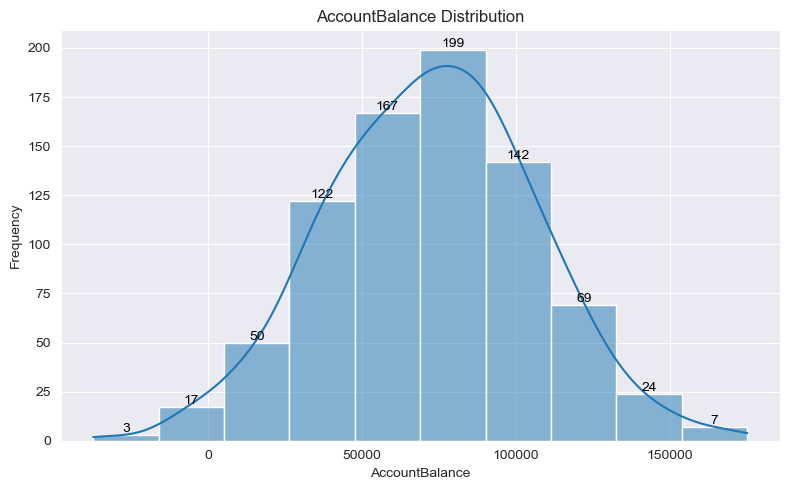

In [34]:
#5.1 Conduct extensive exploratory data analysis with attractive visualizations for your findings.

# 1) Histogram for Account Balance
sns.set_style("darkgrid")
plt.figure(figsize=(8, 5))

ax = sns.histplot(
    df["AccountBalance"],
    bins=10,
    kde=True)

for patch in ax.patches:
    height = patch.get_height()
    if height > 0:
        ax.annotate(
            f'{int(height)}',
            (patch.get_x() + patch.get_width() / 2, height),
            ha='center',
            va='bottom',
            fontsize=10,
            color='black')
plt.title("AccountBalance Distribution")
plt.xlabel("AccountBalance")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

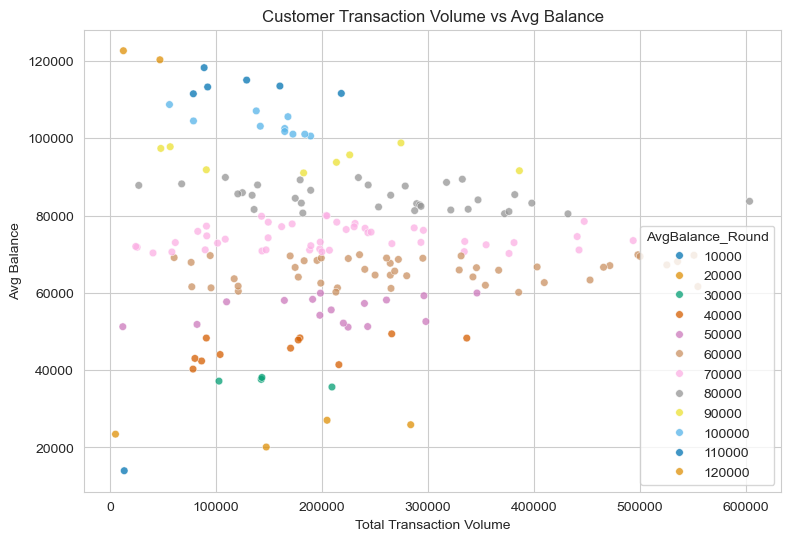

In [35]:
# 2) Scatter Plot: Customer Transaction Volume vs Avg Balance

Customer_Profile["AvgBalance_Round"] = (
    Customer_Profile["AvgBalance"] // 10000 * 10000).astype(int)
sns.set_style("whitegrid")
plt.figure(figsize=(9,6))

sns.scatterplot(
    data=Customer_Profile,
    x="Total_Volume",
    y="AvgBalance",
    hue= "AvgBalance_Round",
    s=30,
    alpha=0.75,
    palette="colorblind")

plt.title("Customer Transaction Volume vs Avg Balance")
plt.xlabel("Total Transaction Volume")
plt.ylabel("Avg Balance")
plt.grid(True)
plt.show()


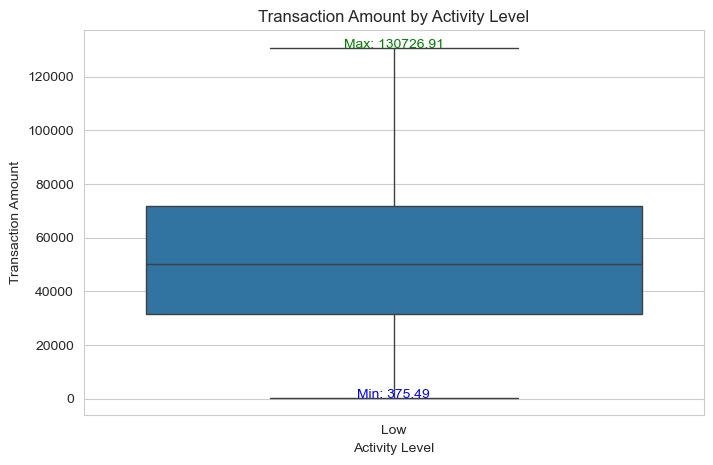

In [36]:
# 3) Boxplot: Transaction Amount by Activity Level

merged = goldman_df.merge(
    Avg_Monthly_Transaction[["CustomerID","ActivityLevel"]],
    on="CustomerID",
    how="left")

plt.figure(figsize=(8,5))

# Draw the boxplot
sns.boxplot(
    data=merged,
    x="ActivityLevel",
    y="TransactionAmount",
    showfliers=False )


# Calculate min and max for each ActivityLevel
grouped = merged.groupby("ActivityLevel")["TransactionAmount"]
mins = grouped.min().values
maxs = grouped.max().values
positions = range(len(mins))

# Annotate min and max
for pos, min_val, max_val in zip(positions, mins, maxs):
    plt.text(pos, min_val, f'Min: {min_val:.2f}', horizontalalignment='center', color='blue')
    plt.text(pos, max_val, f'Max: {max_val:.2f}', horizontalalignment='center', color='green')

plt.title("Transaction Amount by Activity Level")
plt.xlabel("Activity Level")
plt.ylabel("Transaction Amount")
plt.show()



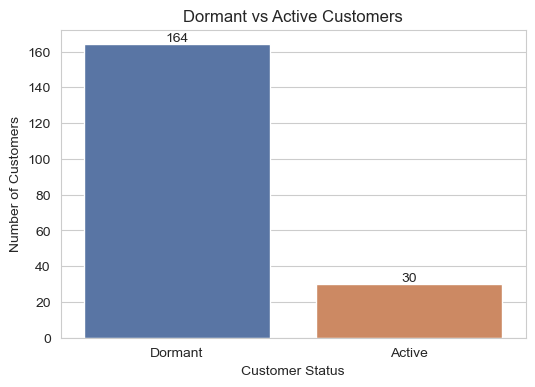

In [37]:
# 4) Countplot to visualize Dormant vs Active customers

# Map boolean to string for better labels
Dormant_accounts['Status'] = Dormant_accounts['Is-Dormant'].map({True: 'Dormant', False: 'Active'})

plt.figure(figsize=(6,4))
sns.countplot(data=Dormant_accounts, x='Status',hue='Status', palette='deep')
plt.title("Dormant vs Active Customers")
plt.xlabel("Customer Status")
plt.ylabel("Number of Customers")

# Add data labels
for p in plt.gca().patches:
    plt.gca().annotate(int(p.get_height()), (p.get_x() + p.get_width()/2., p.get_height()),
                       ha='center', va='bottom')

plt.show()



## Task 6: Hypothesis Testing

In [55]:
# 6.1 Test whether high-volume transaction accounts have statistically higher average balances than low-volume accounts.

from scipy.stats import ttest_ind

# Split groups
q75 = Customer_Profile["Total_Volume"].quantile(0.75)
q25 = Customer_Profile["Total_Volume"].quantile(0.25)

high_volume = Customer_Profile[Customer_Profile["Total_Volume"] >= q75]["AvgBalance"]

low_volume = Customer_Profile[Customer_Profile["Total_Volume"] <= q25]["AvgBalance"]

t_stat, p_value = ttest_ind(high_volume,low_volume,
    alternative="greater",  # one-tailed
    equal_var=False)         # Welch's test

print("T-statistic:", t_stat)
print("P-value:", p_value)
alpha = 0.05
if p_value < alpha:
    print("Decision: Reject H0 → High-volume accounts have higher average balances.")
else:
    print("Decision: Fail to reject H0 → No significant difference found.")

T-statistic: -0.6458575272439284
P-value: 0.7395549106185177
Decision: Fail to reject H0 → No significant difference found.


In [56]:
# 6.2 Conduct hypothesis testing based on segmentation.

q75 = Customer_Profile["Trans_Count"].quantile(0.75)
q25 = Customer_Profile["Trans_Count"].quantile(0.25)

goldman_df["Customer_Segment"] = Customer_Profile["Trans_Count"].apply(lambda x: "High Volume" if x >= q75 else "Low Volume" )

high_volume_bal = goldman_df[goldman_df["Customer_Segment"] == "High Volume"]["AccountBalance"].dropna()
low_volume_bal = goldman_df[goldman_df["Customer_Segment"] == "Low Volume"]["AccountBalance"].dropna()

t_stat, p_value = ttest_ind(high_volume_bal, low_volume_bal, equal_var=False)
print(t_stat, p_value)

if p_value < 0.05: print( "Decision: Reject H0: Significant difference exists") 
else: print( "Decision: Fail to reject H0: No significant difference") 

0.16229630215021854 0.8712636910790821
Decision: Fail to reject H0: No significant difference


# Findings and Recommendation:

## Findings: 
1. Customer Activity: Most customers are Medium activity; fewer are Low or High activity.

2. Transaction Amounts: High-activity accounts have the largest transaction ranges, Low-activity accounts have mostly small transactions.

3. Debit vs Credit Trends: High-activity customers conduct mostly debits, Low-activity accounts have fewer transactions and more credits.

4. High-Risk Accounts: Accounts with long transaction gaps or unusually high transaction spikes are flagged as risky.

## Recommendations:
1. Engage Low-Activity Customers – Encourage them to use their accounts more regularly.

2. Monitor High-Risk Accounts – Track accounts with unusual activity to prevent issues.

3. Customize Services by Segment – Offer products based on customer behavior and account type.